In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

def remove_outliers(df, column):  # IQR method to remove outliers 
    Q1 = df[column].quantile(0.3)
    Q3 = df[column].quantile(0.7)
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered



In [28]:
sample=pd.read_csv('penguins.csv')
print(sample.shape)
print(sample.describe())

numerical_columns = sample.select_dtypes(include=['float64', 'int64']).columns
categorical_columns= sample.select_dtypes(include=['object']).columns

for col in numerical_columns:
    sample[col] = sample[col].fillna(sample[col].mean())
for col in categorical_columns:
    sample[col] = sample[col].fillna(sample[col].mode()[0])
df_clean=sample

df_clean['species'] = df_clean['species'].str.capitalize() # uniform strings
df_clean['island'] = df_clean['island'].str.capitalize()
df_clean['gender'] = df_clean['gender'].str.capitalize()

columns_to_check = ['flipper_length_mm', 'body_mass_g', 'bill_depth_mm', 'bill_length_mm', 'average sleep duration', 'calorie requirement', 'year']
df_og=df_clean.copy()
for column in columns_to_check:
    df_clean = remove_outliers(df_clean, column)
df=df_clean.copy()

(344, 10)
       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.70000

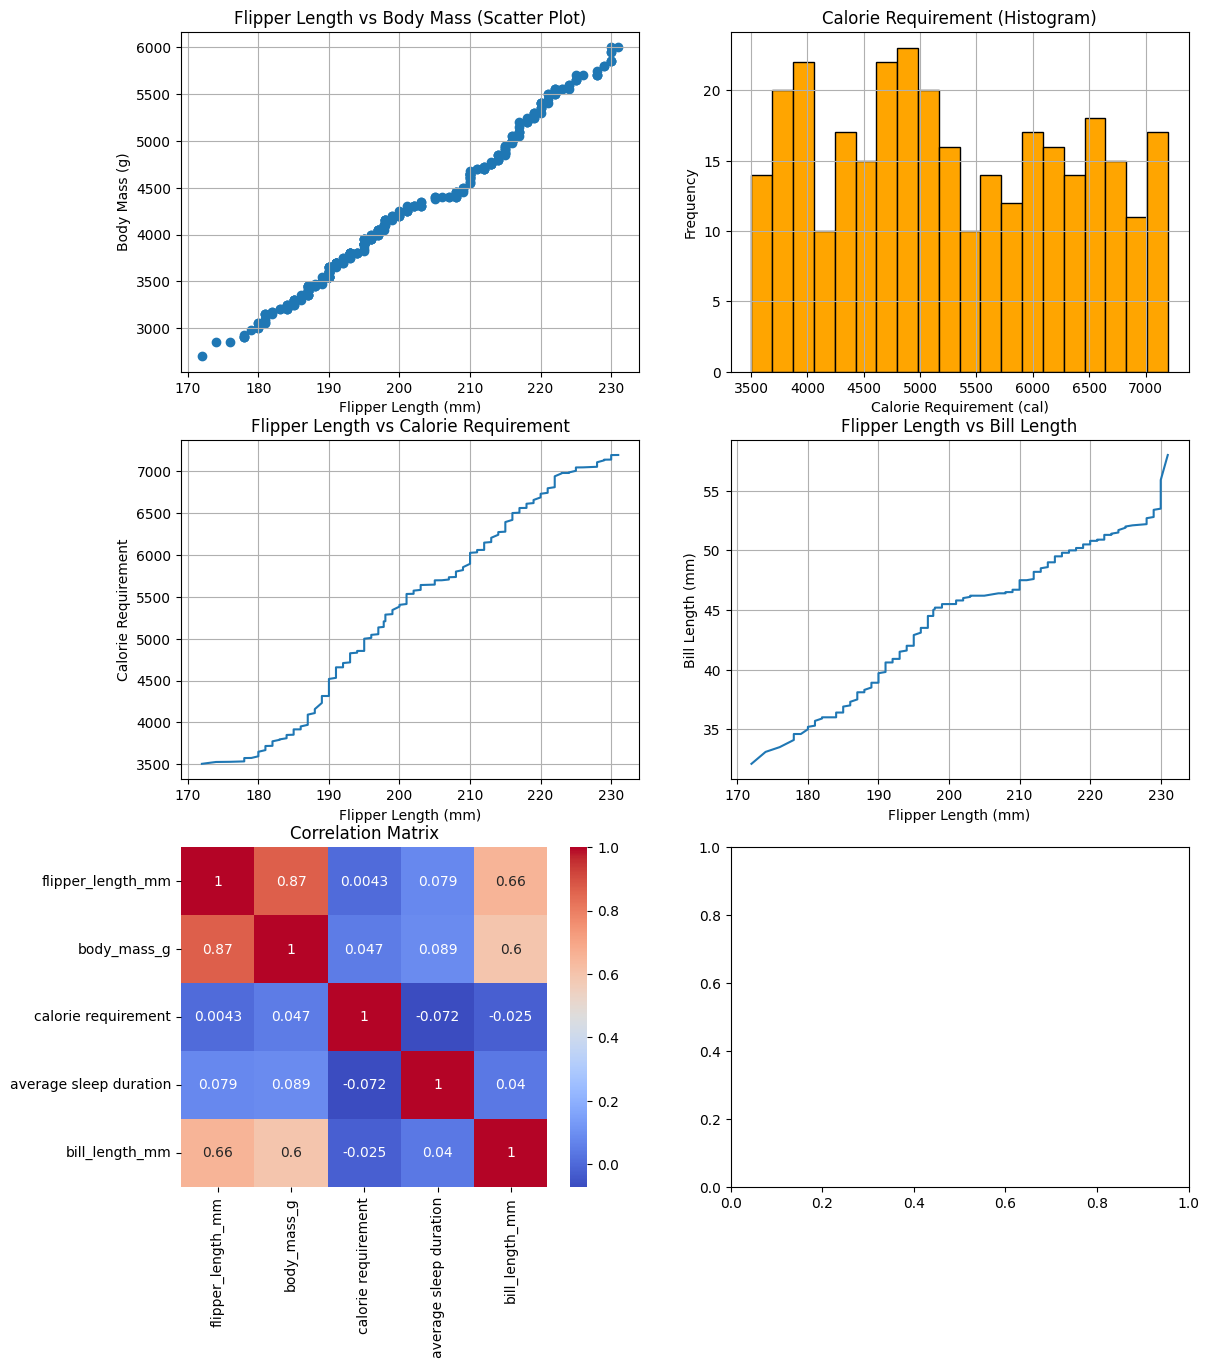

In [29]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(13,15))

flipper_length = df_clean['flipper_length_mm'].tolist()
body_mass = df_clean['body_mass_g'].tolist()
calorie_requirement=df_clean['calorie requirement'].tolist()
average_sleep_duration=df_clean['average sleep duration'].tolist()
bill_length_mm=df_clean['bill_length_mm'].tolist()

flipper_length.sort()
body_mass.sort()
calorie_requirement.sort()
average_sleep_duration.sort(reverse= True)
bill_length_mm.sort()


axs[0,0].scatter(flipper_length, body_mass)
axs[0,0].set_title('Flipper Length vs Body Mass (Scatter Plot)')
axs[0,0].set_xlabel('Flipper Length (mm)')
axs[0,0].set_ylabel('Body Mass (g)')
axs[0,0].grid()

axs[0,1].hist(calorie_requirement, bins=20, color='orange', edgecolor='black')
axs[0,1].set_title('Calorie Requirement (Histogram)')
axs[0,1].set_xlabel('Calorie Requirement (cal)')
axs[0,1].set_ylabel('Frequency')
axs[0,1].grid()

axs[1,0].plot(flipper_length, calorie_requirement)
axs[1,0].set_title('Flipper Length vs Calorie Requirement')
axs[1,0].set_xlabel('Flipper Length (mm)')
axs[1,0].set_ylabel('Calorie Requirement')
axs[1,0].grid()

axs[1,1].plot(flipper_length, bill_length_mm)
axs[1,1].set_title('Flipper Length vs Bill Length')
axs[1,1].set_xlabel('Flipper Length (mm)')
axs[1,1].set_ylabel('Bill Length (mm)')
axs[1,1].grid()

correlation_data = df_clean[['flipper_length_mm', 'body_mass_g', 'calorie requirement', 'average sleep duration', 'bill_length_mm']]
corr_matrix = correlation_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axs[2,0])
axs[2,0].set_title('Correlation Matrix')
plt.show()

In [30]:
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'calorie requirement', 'average sleep duration',]
min_values = df_clean[columns_to_normalize].min()
max_values = df_clean[columns_to_normalize].max()
for col in columns_to_normalize:
    df_clean[col] = (df_clean[col] - min_values[col]) / (max_values[col] - min_values[col])

for col in ['species', 'island', 'gender']:
    df_clean[col + '_encoded'] = df_clean[col].astype('category').cat.codes #to convert categorical data into numerical codes
    
df_encoded = df_clean.drop(columns=['species', 'island', 'gender'])

correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['gender_encoded']

low_correlation_features = target_correlation[abs(target_correlation) < 0.1].index.tolist()
print("LOW: ", low_correlation_features)

high=target_correlation[abs(target_correlation) > 0.4].index.tolist()
print("HIGH: ",high)

df_cleaned = df_encoded.drop(columns=low_correlation_features)
df_cleaned.to_csv('penguins_preprocessed.csv', index=False)

LOW:  ['calorie requirement', 'average sleep duration', 'year', 'species_encoded', 'island_encoded']
HIGH:  ['body_mass_g', 'gender_encoded']


In [31]:
#DATASET 2


sample1=pd.read_csv('diamond.csv')
print(sample1.shape)


columns_to_convert = ['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for column in columns_to_convert:
    sample1[column] = pd.to_numeric(sample1[column], errors='coerce')
numerical_columns1 = sample1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns1= sample1.select_dtypes(include=['object']).columns

print(sample1.describe())
print(sample1.isnull().sum())

for col in numerical_columns1:
    sample1[col] = sample1[col].fillna(sample1[col].mean())
for col in categorical_columns1:
    sample1[col] = sample1[col].fillna(sample1[col].mode()[0])
print(sample1.isnull().sum())
df_clean1=sample1

df_clean1['cut'] = df_clean1['cut'].str.capitalize()
df_clean1['color'] = df_clean1['color'].str.capitalize()
df_clean1['clarity'] = df_clean1['clarity'].str.capitalize()

columns_to_check1 = [ 'Unnamed: 0','carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'price','x','y','z']

df1=df_clean1.copy()
for column in columns_to_check1:
    df_clean1 = remove_outliers(df_clean1, column)

(53940, 13)
         Unnamed: 0         carat  average us salary  \
count  52178.000000  51073.000000       53940.000000   
mean   26979.725804      0.797823       39521.990100   
std    15566.154681      0.473747        5486.892971   
min        1.000000      0.200000       30000.000000   
25%    13498.250000      0.400000       34780.000000   
50%    26989.500000      0.700000       39547.500000   
75%    40458.750000      1.040000       44252.000000   
max    53940.000000      5.010000       48999.000000   

       number of diamonds mined (millions)         depth         table  \
count                         53940.000000  51866.000000  51030.000000   
mean                              2.902669     61.750175     57.456332   
std                               1.325985      1.433485      2.231611   
min                               0.600000     43.000000     43.000000   
25%                               1.750000     61.000000     56.000000   
50%                               2.910

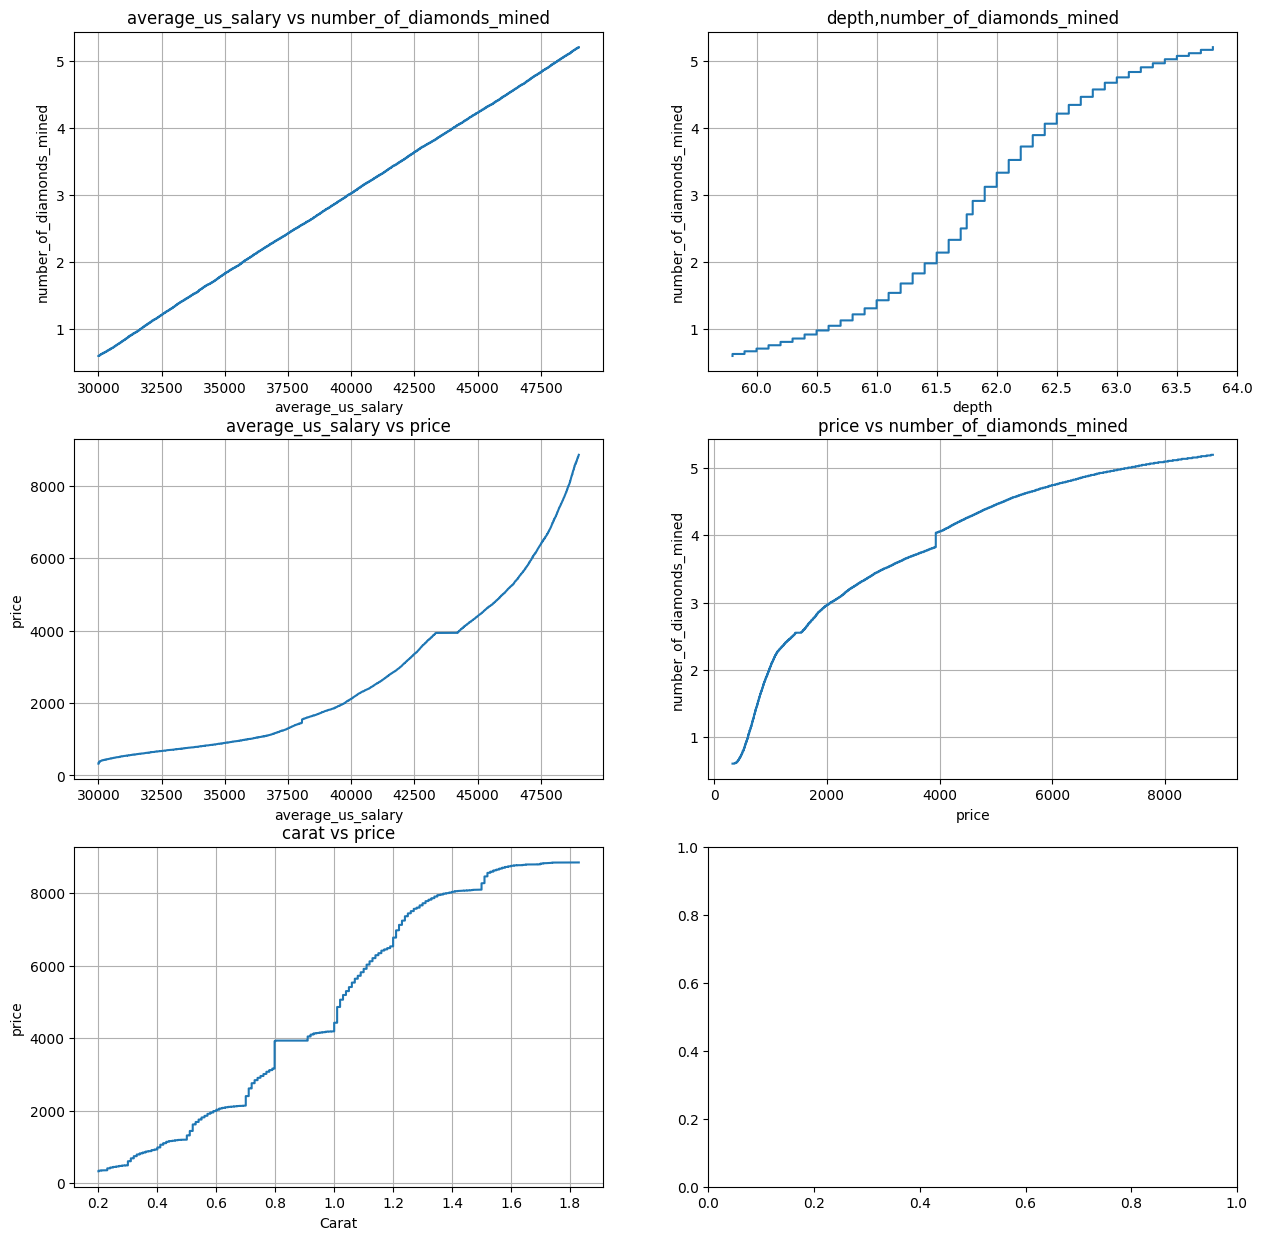

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

average_us_salary = df_clean1['average us salary'].tolist()
number_of_diamonds_mined = df_clean1['number of diamonds mined (millions)'].tolist()
depth=df_clean1['depth'].tolist()
carat=df_clean1['carat'].tolist()
price=df_clean1['price'].tolist()

average_us_salary.sort()
number_of_diamonds_mined.sort()
depth.sort()
carat.sort()
price.sort()


axs[0,0].plot(average_us_salary, number_of_diamonds_mined)
axs[0,0].set_title('average_us_salary vs number_of_diamonds_mined')
axs[0,0].set_xlabel('average_us_salary')
axs[0,0].set_ylabel('number_of_diamonds_mined')
axs[0,0].grid()

axs[0,1].plot(depth,number_of_diamonds_mined)
axs[0,1].set_title('depth,number_of_diamonds_mined')
axs[0,1].set_xlabel('depth')
axs[0,1].set_ylabel('number_of_diamonds_mined')
axs[0,1].grid()

axs[1,0].plot(average_us_salary,price)
axs[1,0].set_title('average_us_salary vs price')
axs[1,0].set_xlabel('average_us_salary')
axs[1,0].set_ylabel('price')
axs[1,0].grid()

axs[1,1].plot(price, number_of_diamonds_mined)
axs[1,1].set_title('price vs number_of_diamonds_mined')
axs[1,1].set_xlabel('price')
axs[1,1].set_ylabel('number_of_diamonds_mined')
axs[1,1].grid()

axs[2,0].plot(carat, price)
axs[2,0].set_title('carat vs price')
axs[2,0].set_xlabel('Carat')
axs[2,0].set_ylabel('price')
axs[2,0].grid()
plt.show()

In [33]:
columns_to_normalize1 = ['Unnamed: 0', 'carat', 'average us salary', 'number of diamonds mined (millions)','depth','table','price','x','y','z']
min_values1 = df_clean1[columns_to_normalize1].min()
max_values1 = df_clean1[columns_to_normalize1].max()
df_normalized1 = df_clean1.copy()
for col in columns_to_normalize1:
    df_normalized1[col] = (df_clean1[col] - min_values1[col]) / (max_values1[col] - min_values1[col])

for col in ['cut', 'color', 'clarity']:
    df_clean1[col + '_encoded'] = df_clean1[col].astype('category').cat.codes # Task 8, label encoding since islands and species are more than 2 types
df_encoded1 = df_clean1.drop(columns=['cut', 'color', 'clarity'])
correlation_matrix1 = df_encoded1.corr()
target_correlation1 = correlation_matrix1['color_encoded']
low_correlation_features1 = target_correlation1[abs(target_correlation1) < 0.1].index.tolist()
print("LOW: " ,low_correlation_features1)
df_cleaned1 = df_encoded1.drop(columns=low_correlation_features1)

df_cleaned1.to_csv('diamond_preprocessed.csv', index=False)

LOW:  ['Unnamed: 0', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 'cut_encoded', 'clarity_encoded']


In [34]:
#DATASET 3


sample2=pd.read_csv('emissions_by_country.csv')

print(sample2.isnull().sum())

numerical_columns2 = sample2.select_dtypes(include=['float64', 'int64']).columns
categorical_columns2= sample2.select_dtypes(include=['object']).columns

#sample2=sample2.dropna()

for col in numerical_columns2:
    sample2[col] = sample2[col].fillna(sample2[col].mean())
for col in categorical_columns2:
    sample2[col] = sample2[col].fillna(sample2[col].mode()[0])

sample2['Total'] = sample2[['Coal', 'Oil','Gas','Cement','Flaring','Other']].sum(axis=1)

print(sample2.shape)
print(sample2.describe())
df_clean2=sample2

df_clean2['Country'] = df_clean2['Country'].str.capitalize()
df_clean2['ISO 3166-1 alpha-3'] = df_clean2['ISO 3166-1 alpha-3'].str.capitalize()

columns_to_check2 = [ 'Total','Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas','Cement','Flaring','Other','Per Capita']

df2=df_clean2.copy()
for column in columns_to_check2:
    df_clean2 = remove_outliers(df_clean2, column)

emmision=df_clean2

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64
(63104, 13)
               Year         Total   Temperature  GDP Per Capita (USD)  \
count  63104.000000  63104.000000  63104.000000          63104.000000   
mean    1888.267097   1374.098797     49.497813          39026.539015   
std      121.874172   1050.283290     17.292092          10975.539432   
min     1003.000000      0.141996     20.000000          20000.000000   
25%     1817.000000    913.162372     35.000000          29498.750000   
50%     1888.000000   1374.098797     49.000000          39067.000000   
75%     1954.250000   1374.098797     64.000000          48544.250000   
m

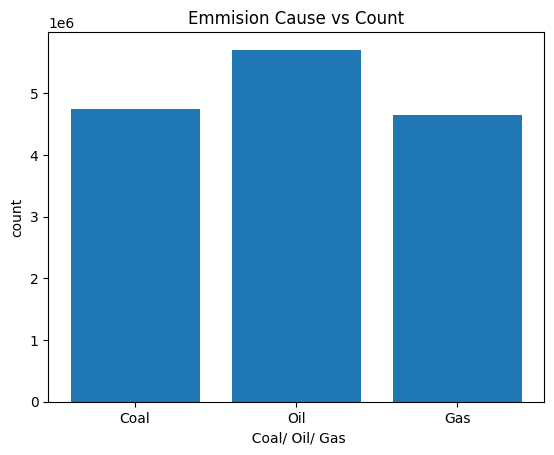

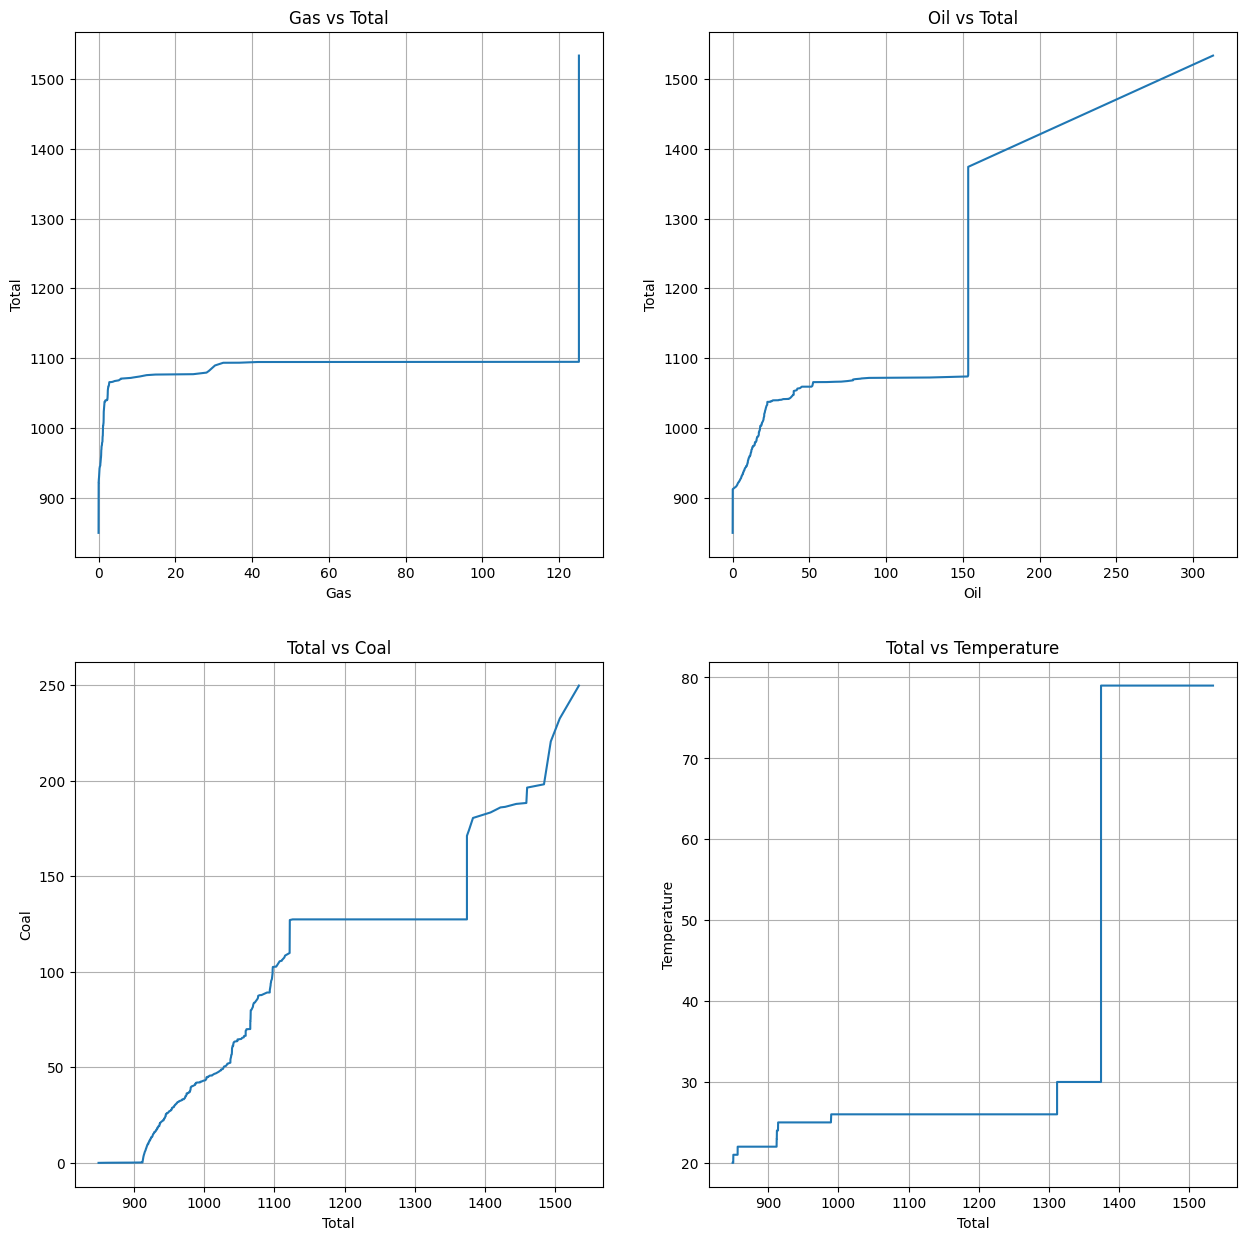

In [35]:

Total = df_clean2['Total'].tolist()
Temperature = df_clean2['Temperature'].tolist()
GDP_Per_Capita =df_clean2['GDP Per Capita (USD)'].tolist()
Coal=df_clean2['Coal'].tolist()
Oil=df_clean2['Oil'].tolist()
Gas=df_clean2['Gas'].tolist()
Year=df_clean2['Year'].tolist()
Total_emission = df_clean2.groupby('Country')['Total'].sum()


Total.sort()
Temperature.sort()
GDP_Per_Capita.sort()
Coal.sort()
Oil.sort()
Oil.sort()
Gas.sort()
Year.sort()
# print(df_clean2.head())

x_axis= ['Coal', 'Oil', 'Gas']
Y_axis=[sum(Coal), sum(Oil), sum(Gas)]
plt.bar(x_axis,Y_axis)
plt.title('Emmision Cause vs Count')
plt.ylabel("count")
plt.xlabel("  Coal/ Oil/ Gas ")
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0,0].plot(Gas ,Total)
axs[0,0].set_title("Gas vs Total")
axs[0,0].set_xlabel('Gas')
axs[0,0].set_ylabel('Total')
axs[0,0].grid()

axs[0,1].plot(Oil ,Total)
axs[0,1].set_title('Oil vs Total')
axs[0,1].set_xlabel('Oil')
axs[0,1].set_ylabel('Total')
axs[0,1].grid()

axs[1,0].plot(Total,Coal)
axs[1,0].set_title('Total vs Coal')
axs[1,0].set_xlabel('Total')
axs[1,0].set_ylabel('Coal')
axs[1,0].grid()

axs[1,1].plot(Total,Temperature)
axs[1,1].set_title('Total vs Temperature')
axs[1,1].set_xlabel('Total')
axs[1,1].set_ylabel('Temperature')
axs[1,1].grid()

plt.show()



In [40]:
columns_to_normalize2 = ['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)','Coal','Oil','Gas','Cement','Flaring','Other','Per Capita']
min_values2 = df_clean2[columns_to_normalize2].min()
max_values2 = df_clean2[columns_to_normalize2].max()
df_normalized2 = df_clean2.copy()
for col in columns_to_normalize2:
    df_normalized2[col] = (df_clean2[col] - min_values2[col]) / (max_values2[col] - min_values2[col])

for col in ['Country', 'ISO 3166-1 alpha-3']:
    df_clean2[col + '_encoded'] = df_clean2[col].astype('category').cat.codes #to convert categorical data into numerical codes
df_encoded2 = df_clean2.drop(columns=['Country', 'ISO 3166-1 alpha-3'])
correlation_matrix2 = df_encoded2.corr()
target_correlation2 = correlation_matrix2['Total']
low_correlation_features2 = target_correlation2[abs(target_correlation2) < 0.1].index.tolist()
print("LOW:", low_correlation_features2)
df_cleaned2 = df_encoded2.drop(columns=low_correlation_features2)

df_cleaned2.to_csv('emissions_by_country_preprocessed.csv', index= False)

LOW: ['Temperature', 'GDP Per Capita (USD)', 'Country_encoded', 'ISO 3166-1 alpha-3_encoded']
